In [109]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

# #import personnal tools
# import sys
# sys.path.append('../python_tools/')
# from tools import *
# from tools_native import *
# from tools_mapping import *

pres=(ap_bnds(k)+ap_bnds(k+1))/2 + sp*(b_bnds(k)+b_bnds(k+1))/2 

In [ ]:
import xarray as xr
import numpy as np
import os

filename='../../data/tmp_all.nc'
fileout='../../data/tmp_all_with_pres.nc'

nf=xr.open_dataset(filename)

#define k+1 vars
nf['ap_bnds_k+1']=nf['ap_bnds'][0].shift(klevp1=-1)
nf['real_ap']=(nf['ap_bnds'][0,0:79]+nf['ap_bnds_k+1'][0:79])/2

nf['b_bnds_k+1']=nf['b_bnds'][0].shift(klevp1=-1)
nf['real_b']=(nf['b_bnds'][0,0:79]+nf['b_bnds_k+1'][0:79])/2

#define empty variable pres with dimensions time, lon, lat, presnivs
# nf['pres']=(['time','presnivs','lat','lon'],np.zeros((len(nf['time']),79, len(nf['lat']),len(nf['lon']))))
# nf['pres'] = xr.DataArray(
#     np.zeros((len(nf['time']), 79, len(nf['lat']), len(nf['lon']))),
#     dims=['time', 'presnivs', 'lat', 'lon']
# )
nf['pres'] = xr.full_like(nf['t'], fill_value=0)
nf['pres'].attrs['long_name']='pressure'
nf['pres'].attrs['units']='Pa'

#add value to pres
for i in range(79):
    nf['pres'][:,i,:,:]=nf['real_ap'][i]+nf['real_b'][i]*nf['sp'][:,:,:]

#add 3 extra vars
nf['cbwc']=xr.full_like(nf['t'], fill_value=0)
nf['ciwc']=xr.full_like(nf['t'], fill_value=0)
nf['clwc']=xr.full_like(nf['t'], fill_value=0)


#drop ap, ap_bnds, b, b_bnds, ap_bnds_k+1, b_bnds_k+1, real_ap, real_b
nf=nf.drop_vars(['ap','ap_bnds','b','b_bnds','ap_bnds_k+1','b_bnds_k+1','real_ap','real_b'])
#drop dimension klevp1
nf=nf.drop_dims('klevp1')

#export to netcdf
if os.path.exists(fileout):
    os.remove(fileout)
nf.to_netcdf(fileout)

In [111]:
nf2=xr.open_dataset(fileout)
nf2

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 28, lon: 19, presnivs: 79, time: 123)
Coordinates:
  * bnds       (bnds) float32 1.0 2.0
  * lat        (lat) float32 20.28 21.55 22.82 24.08 ... 50.7 51.97 53.24 54.51
  * lon        (lon) float32 -25.0 -22.5 -20.0 -17.5 ... 12.5 15.0 17.5 20.0
  * presnivs   (presnivs) float32 1.012e+05 1.009e+05 1.007e+05 ... 5.297 1.483
  * time       (time) datetime64[ns] 2010-01-01T06:00:00 ... 2010-01-31T18:00:00
Data variables:
    q          (time, presnivs, lat, lon) float32 ...
    sp         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
    t          (time, presnivs, lat, lon) float32 ...
    ua         (time, presnivs, lat, lon) float32 ...
    va         (time, presnivs, lat, lon) float32 ...
    pres       (time, presnivs, lat, lon) float32 ...
    cbwc       (time, presnivs, lat, lon) float32 ...
    ciwc       (time, presnivs, lat, lon) float32 ...
    clwc       (time, presnivs, lat, lon) float32 ...
Attributes: (12/54)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96;...
    institution:                Institut Pierre Simon Laplace, Paris 75252, F...
    Conventions:                CF-1.7 CMIP-6.2
    creation_date:              2018-08-05T09:24:23Z
    tracking_id:                hdl:21.14100/a6d57621-868e-4da8-9735-970d1ebe...
    ...                         ...
    variant_label:              r1i1p1f1
    realization_index:          1
    NCO:                        netCDF Operators version 5.0.1 (Homepage = ht...
    CDO:                        Climate Data Operators version 1.9.10 (https:...
    history_of_appended_files:  Wed Mar 19 15:05:45 2025: Appended file tmp_v...
    history:                    Wed Mar 19 15:05:46 2025: ncrename -O -v ps,s...

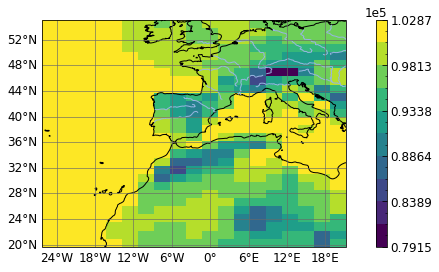

In [114]:
#plot sp for file nf
ds=nf2
presniv=0
var='pres'
plotvar=ds[var][0,presniv,:,:]
map_plotvar(plotvar)